In [1]:
import os
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Definir el directorio donde se extraen los archivos y las rutas para los conjuntos de datos



In [4]:
dataset_dir = r'C:\Users\dcouto\Desktop\Nueva carpeta\archive\real_vs_fake\real-vs-fake'

train_dir = os.path.join(dataset_dir, 'train')
val_dir = os.path.join(dataset_dir, 'valid')
test_dir = os.path.join(dataset_dir, 'test')


Definir las transformaciones usando ImageDataGenerator


In [13]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

Cargar datasets


In [7]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)


Found 6000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


Cargar y compilar el modelo 

In [8]:

# Cargar el modelo preentrenado VGG16
base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Congelar las capas base del modelo
base_model.trainable = False

# Crear el modelo completo
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Salida binaria (real o fake)
])

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Entrenamiento

In [9]:
# Entrenamiento del modelo
num_epochs = 10  # Ajusta el número de épocas según sea necesario
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=num_epochs
)


Epoch 1/10
187/187 [==============================] - 793s 4s/step - loss: 0.9482 - accuracy: 0.6036 - val_loss: 0.6197 - val_accuracy: 0.6643
Epoch 2/10
187/187 [==============================] - 767s 4s/step - loss: 0.6293 - accuracy: 0.6640 - val_loss: 0.5798 - val_accuracy: 0.6910
Epoch 3/10
187/187 [==============================] - 767s 4s/step - loss: 0.6247 - accuracy: 0.6679 - val_loss: 0.5592 - val_accuracy: 0.7172
Epoch 4/10
187/187 [==============================] - 773s 4s/step - loss: 0.5913 - accuracy: 0.6947 - val_loss: 0.5228 - val_accuracy: 0.7364
Epoch 5/10
187/187 [==============================] - 776s 4s/step - loss: 0.5611 - accuracy: 0.7123 - val_loss: 0.5259 - val_accuracy: 0.7349
Epoch 6/10
187/187 [==============================] - 771s 4s/step - loss: 0.5628 - accuracy: 0.7121 - val_loss: 0.5990 - val_accuracy: 0.6739
Epoch 7/10
187/187 [==============================] - 773s 4s/step - loss: 0.5654 - accuracy: 0.7068 - val_loss: 0.5215 - val_accuracy: 0.7440

Evaluación

In [10]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Accuracy en el conjunto de prueba: {test_accuracy * 100:.2f}%')

63/63 [==============================] - 181s 3s/step - loss: 0.5533 - accuracy: 0.7250
Accuracy en el conjunto de prueba: 72.50%


Pintar historia de entrenamiento

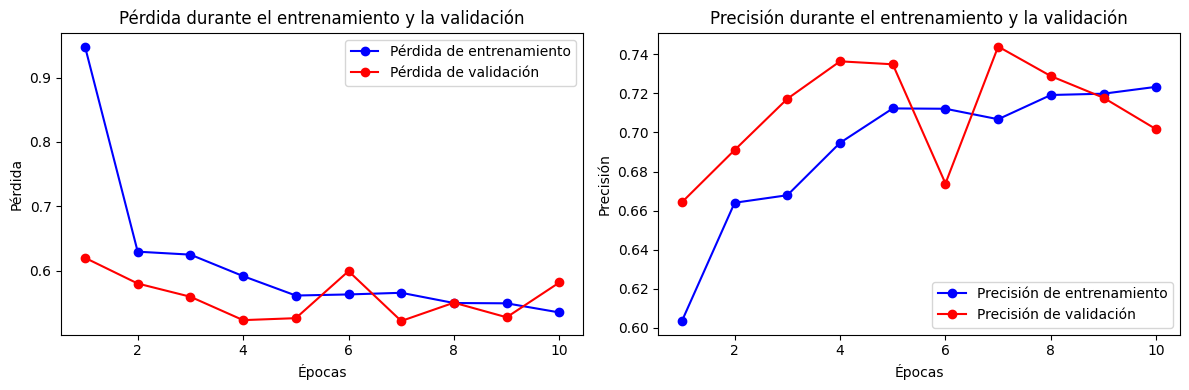

In [12]:
import matplotlib.pyplot as plt

# Asume que 'history' es el resultado de model.fit()
history_dict = history.history

# Obtener los datos de pérdida y precisión
loss = history_dict['loss']
val_loss = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

# Crear el rango de épocas
epochs = range(1, len(loss) + 1)

# Graficar la pérdida
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo-', label='Pérdida de entrenamiento')
plt.plot(epochs, val_loss, 'ro-', label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Graficar la precisión
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'bo-', label='Precisión de entrenamiento')
plt.plot(epochs, val_accuracy, 'ro-', label='Precisión de validación')
plt.title('Precisión durante el entrenamiento y la validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.tight_layout()
plt.show()


Guardare modelo


In [11]:
model.save("VGGNet_Keras.h5")

c:\Users\dcouto\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Enlace modelo entrenado con 10 epoch con un resultado de 0,725 de accuracy: https://drive.google.com/file/d/1FsyQDNm5G6s67wyc2esYA_UdLvthHbYS/view?usp=drive_link